# Handwritten Digit Recognition Model Training

In [1]:
# Import required Libraries:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Import the MNIST Dataset:

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# Printing the shapes of both Training & Testing Datasets as well as their Labels:

print("Shape of Training Dataset:", x_train.shape)
print("Shape of Training Dataset Labels:", y_train.shape)
print("Shape of Test Dataset:", x_test.shape)
print("Shape of Test Dataset Labels:", y_test.shape)

Shape of Training Dataset: (60000, 28, 28)
Shape of Training Dataset Labels: (60000,)
Shape of Test Dataset: (10000, 28, 28)
Shape of Test Dataset Labels: (10000,)


[5 0 4 1 9]


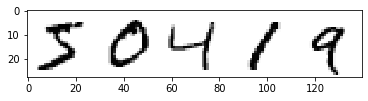

In [4]:
# Print the labels of the first 5 digits present in the Taining dataset:

nb_images = 5
print(y_train[:nb_images])

# Also, Let's see the images of first 5 digits present in the Taining dataset:

train_images = np.hstack(x_train[:nb_images])
plt.imshow(train_images, cmap='Greys')

In [5]:
# Now, we will create a Neural Network model and define the layers of our model:

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Softmax()
])

# Print the summary of the model:

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# Defining of Loss Function for our model:

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 

In [7]:
# Compile our model:

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [8]:
# Training of our model:

hist = model.fit(x_train, y_train, epochs=10, shuffle=True, batch_size=256, validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 32us/sample - loss: 1.6915 - accuracy: 0.8176 - val_loss: 1.5610 - val_accuracy: 0.9172
Epoch 2/10
48000/48000 [==============================] - 1s 13us/sample - loss: 1.5635 - accuracy: 0.9139 - val_loss: 1.5379 - val_accuracy: 0.9351
Epoch 3/10
48000/48000 [==============================] - 1s 13us/sample - loss: 1.5428 - accuracy: 0.9300 - val_loss: 1.5285 - val_accuracy: 0.9413
Epoch 4/10
48000/48000 [==============================] - 1s 14us/sample - loss: 1.5317 - accuracy: 0.9389 - val_loss: 1.5186 - val_accuracy: 0.9503
Epoch 5/10
48000/48000 [==============================] - 1s 12us/sample - loss: 1.5235 - accuracy: 0.9458 - val_loss: 1.5128 - val_accuracy: 0.9554
Epoch 6/10
48000/48000 [==============================] - 1s 13us/sample - loss: 1.5172 - accuracy: 0.9511 - val_loss: 1.5087 - val_accuracy: 0.9581
Epoch 7/10
48000/48000 [==============================] 

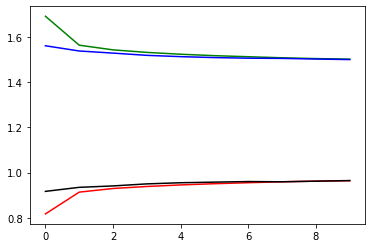

In [9]:
# Plotting of the graphs of Loss & Accuracy of both the Training as well as Validation:

plt.figure(0)
plt.plot(hist.history['loss'], 'g')
plt.plot(hist.history['val_loss'], 'b')
plt.plot(hist.history['accuracy'], 'r')
plt.plot(hist.history['val_accuracy'], 'black')
plt.show()

In [10]:
# Checking the model's performance on the Test Dataset:

model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 0s - loss: 1.4809 - accuracy: 0.9666


[1.4987483066558838, 0.9666]

In [11]:
# Saving the model:

model.save('my_mnist_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_mnist_model/assets


In [12]:
print(x_train[:1].shape)

(1, 28, 28)


In [13]:

model.predict(x_train[:1])

array([[8.6239737e-08, 2.3835590e-11, 5.0094275e-08, 1.0621590e-03,
        7.5798615e-15, 9.9893767e-01, 2.3644222e-12, 3.6226275e-09,
        9.7094344e-10, 1.3533512e-10]], dtype=float32)

In [14]:
np.argmax(model.predict(x_train[:1]))

5